In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
from google.colab import files

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
uploaded = files.upload()
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

df.head()

Saving truck_mileage_realistic_india.csv to truck_mileage_realistic_india.csv


,distance_km,engine_cc,fuel_tank_liters,payload_kg,loaded_weight_kg,number_of_tyres,mileage_kmpl
0,1176,6583,112,22304,34304,16,3.032063
1,910,3823,258,9420,19920,14,1.503247
2,1180,4081,197,18927,21927,4,5.010954
3,1145,5419,232,21081,31581,14,1.676482
4,1094,3574,204,20380,33880,18,2.828039


In [ ]:
X = df[[
    "distance_km",
    "engine_cc",
    "fuel_tank_liters",
    "payload_kg",
    "loaded_weight_kg",
    "number_of_tyres"
]]
y = df["mileage_kmpl"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42 )

In [ ]:
model = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

In [ ]:
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\n Model Performance:")
print(f"MAE  : {mae:.3f}")
print(f"MSE  : {mse:.3f}")
print(f"RMSE : {rmse:.3f}")
print(f"R²   : {r2:.3f}")


 Model Performance:
MAE  : 0.747
MSE  : 0.838
RMSE : 0.915
R²   : 0.802


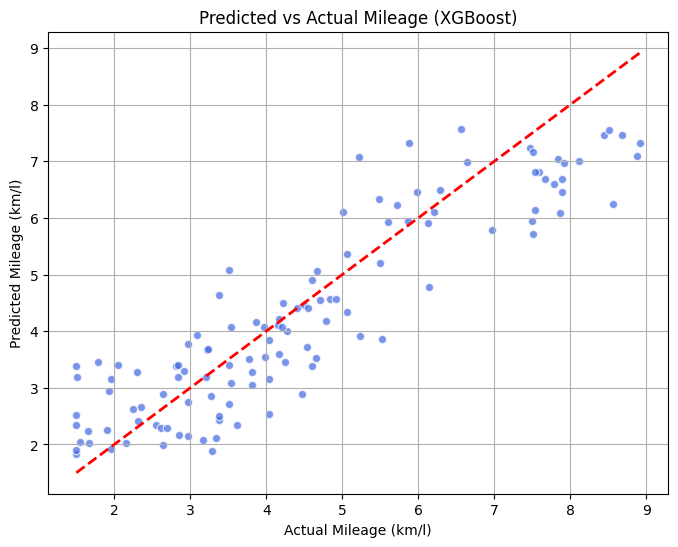

In [ ]:
# Predicted vs Actual Plot
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7, color='royalblue', edgecolors='white')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Mileage (km/l)")
plt.ylabel("Predicted Mileage (km/l)")
plt.title("Predicted vs Actual Mileage (XGBoost)")
plt.grid(True)
plt.show()

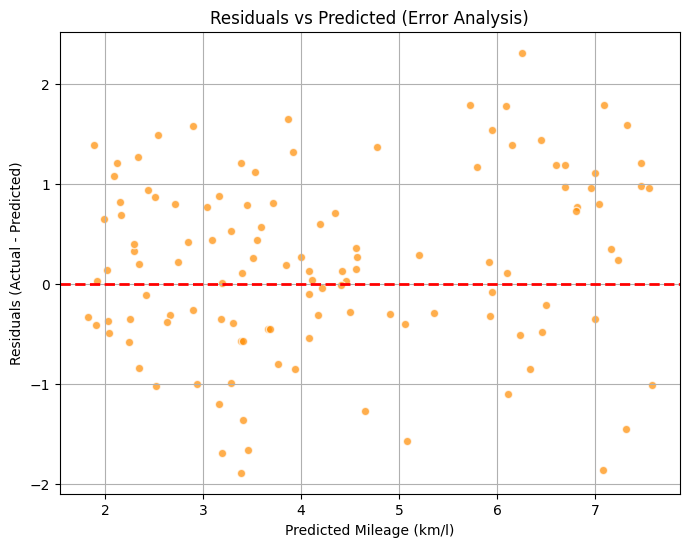

In [ ]:
residuals = y_test - y_pred
plt.figure(figsize=(8,6))
plt.scatter(y_pred, residuals, alpha=0.7, color='darkorange', edgecolors='white')
plt.axhline(0, color='red', linestyle='--', lw=2)
plt.xlabel("Predicted Mileage (km/l)")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residuals vs Predicted (Error Analysis)")
plt.grid(True)
plt.show()

In [ ]:
model.save_model("/content/drive/MyDrive/model.json")
print(" Model saved as JSON!")

 Model saved as JSON!
